In [1]:
#import the required libraries
%matplotlib notebook

import pandas as pd
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import cartopy as cp
from cartopy import config
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import seaborn as sns

In [2]:
plt.ion() # make the plotting interactive

# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

# create a scale bar of length 20 km in the upper right corner of the map
# adapted this question: https://stackoverflow.com/q/32333870
# answered by SO user Siyh: https://stackoverflow.com/a/35705477
def scale_bar(ax, location=(0.92, 0.95)):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    plt.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=tmc)
    plt.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=tmc)

    plt.text(sbx, sby-4500, '20 km', transform=tmc, fontsize=8)
    plt.text(sbx-12500, sby-4500, '10 km', transform=tmc, fontsize=8)
    plt.text(sbx-24500, sby-4500, '0 km', transform=tmc, fontsize=8)

In [3]:
#Read radon data of the Northern Ireland
radon_table = pd.read_csv('data_files\RadonNI.csv')

In [4]:
radon_table.shape # dispaly the data structure: 14720 rows and 4 columns

(14720, 4)

In [5]:
radon_table.info() # More information about the data: 14720 entries, position from 0 to 14719 arranged in 4 columns
                    # first column is object format, while the other three are in integre formats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14720 entries, 0 to 14719
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tile    14720 non-null  object
 1   class   14720 non-null  int64 
 2   x       14720 non-null  int64 
 3   y       14720 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 460.1+ KB


In [6]:
radon_table["class"]

0        1
1        1
2        1
3        2
4        2
        ..
14715    5
14716    4
14717    4
14718    4
14719    4
Name: class, Length: 14720, dtype: int64

In [7]:
radon_table.head(10) #show the top 10 rows with the column headings

Tile  class       x       y
0  D1053      1  310500  453500
1  D1153      1  311500  453500
2  D1253      1  312500  453500
3  D0952      2  309500  452500
4  D1052      2  310500  452500
5  D1152      2  311500  452500
6  D1252      2  312500  452500
7  D1352      2  313500  452500
8  D1452      2  314500  452500
9  D1552      1  315500  452500

In [8]:
# summary statistics
radon_table.describe()

class              x              y
count  14720.000000   14720.000000   14720.000000
mean       2.682541  284638.111413  373938.383152
std        1.541938   41306.305800   32692.536830
min        1.000000  188500.000000  309500.000000
25%        1.000000  250500.000000  347500.000000
50%        2.000000  288500.000000  370500.000000
75%        4.000000  318500.000000  399500.000000
max        6.000000  366500.000000  453500.000000

In [9]:
radon_table['class'].describe().round(0) # descriptive statistics of the radon classes, round numbers to nearest integer.

count    14720.0
mean         3.0
std          2.0
min          1.0
25%          1.0
50%          2.0
75%          4.0
max          6.0
Name: class, dtype: float64

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


<IPython.core.display.Javascript object>


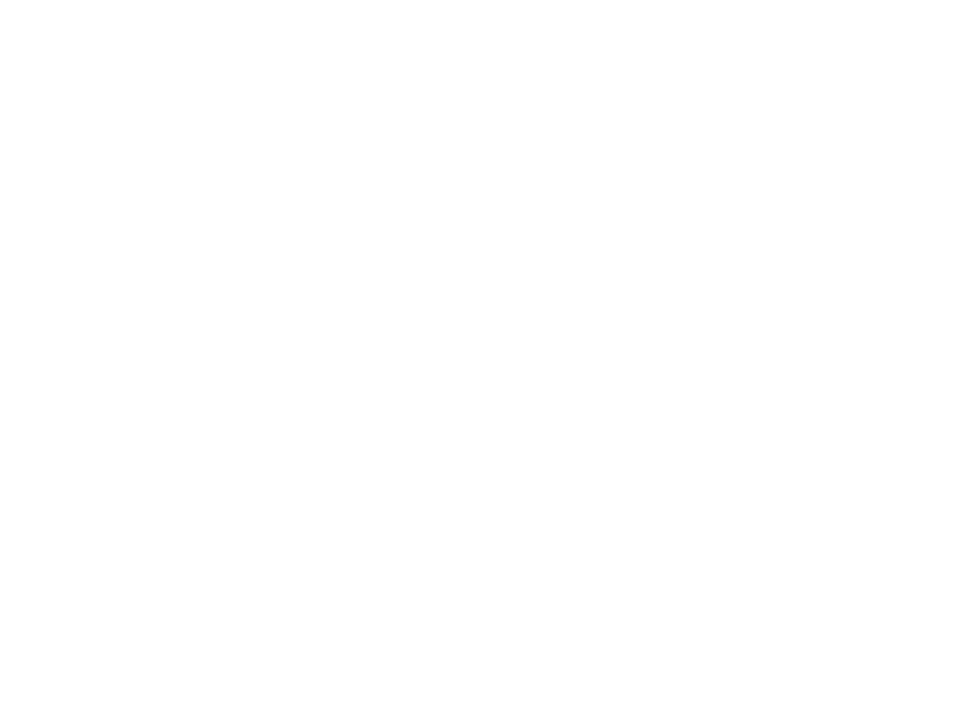

In [10]:
# set the coordinate type (to epsg:29902) and plot the radon data with respect to x, y
pts = [Point(row['x'], row['y']) for id, row in radon_table[['x', 'y']].iterrows()]
pts = gpd.GeoSeries(pts, crs='+init=epsg:29902')
pts.plot();

In [11]:
pts.crs # check the coordinate systems

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [12]:
# another way to assign the coordinate system.
radon_gdf = gpd.GeoDataFrame(radon_table, geometry=gpd.points_from_xy(radon_table.x, radon_table.y), crs='+init=epsg:29902')

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [13]:
radon_gdf.crs # check the coordinate system of the new dataset (radon_gdf)

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [14]:
radon_gdf.to_file('data_files/RadonNI.shp') # create a new shapefile of the radon data

In [15]:
radon = gpd.read_file('data_files/RadonNI.shp') # load the radon shapefile

<AxesSubplot:>

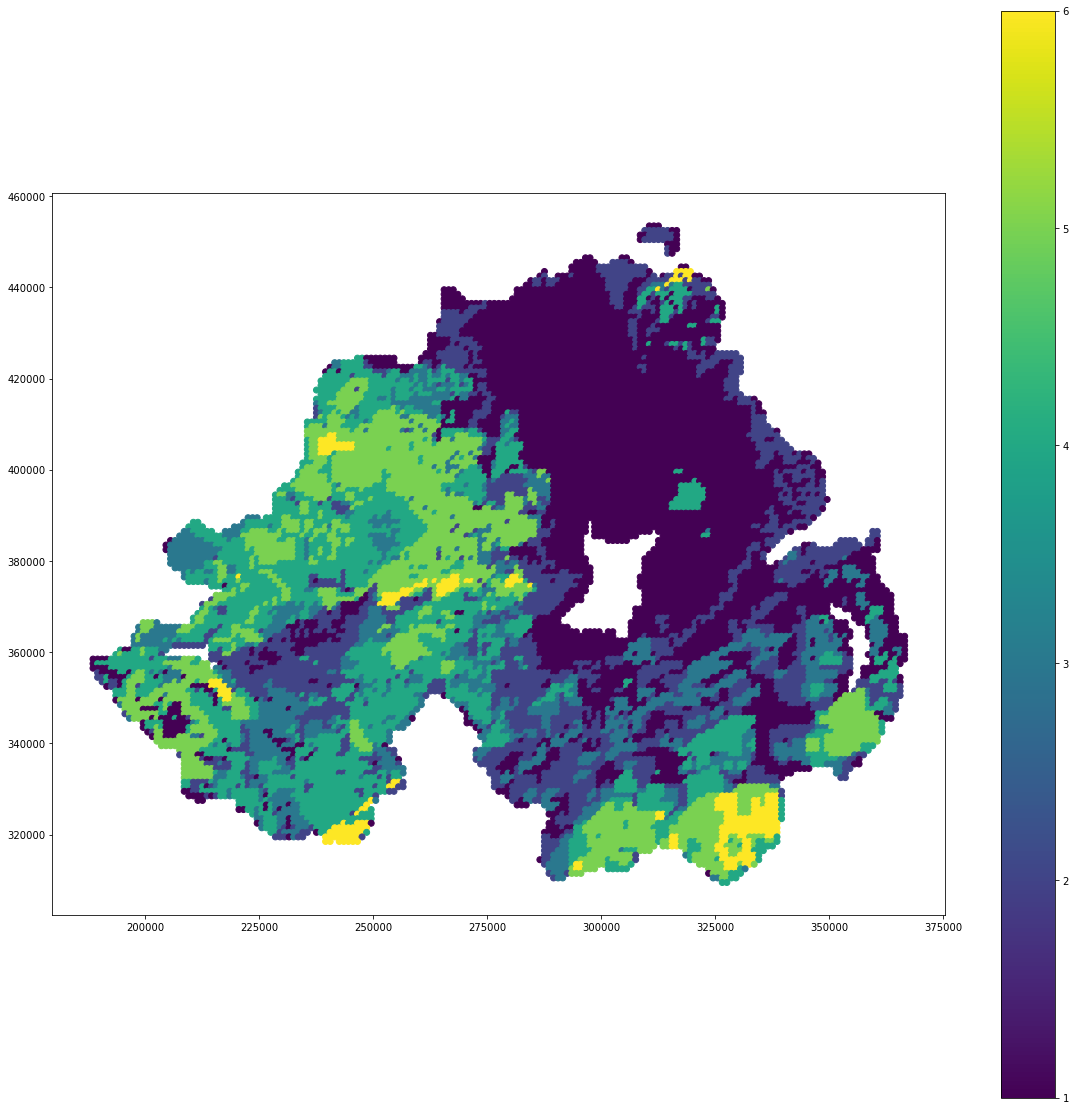

In [16]:
%matplotlib inline
radon.plot(column='class', cmap=None, legend=True, figsize=(20, 20)) # display the new shapefile, symbology is based on the attribute class, i.e. radon class

Now, we need to load the Northern Ireland Counties map (shapefile)

In [17]:
counties_orig = gpd.read_file('data_files/Counties.shp') # load the Counties shapefile

In [18]:
counties_orig.shape # Table of attributes is made up of 6 rows and five columns

(6, 5)

In [19]:
counties_orig.columns # read the column headings

Index(['COUNTY_ID', 'CountyName', 'Area_SqKM', 'OBJECTID', 'geometry'], dtype='object')

In [20]:
divisions = counties_orig['CountyName'].tolist() # Get a list of a the counties; 6 counties
print(divisions)

['TYRONE', 'ANTRIM', 'ARMAGH', 'FERMANAGH', 'LONDONDERRY', 'DOWN']


In [21]:
# display the data. 
# Note that each county is represented by one polygon while county Antrim is represnted by more than one polygon (due to the presence of Rathlin ireland in the north)
counties_orig.head()

COUNTY_ID   CountyName    Area_SqKM  OBJECTID  \
0          6       TYRONE  3265.796622         1   
1          1       ANTRIM  3097.847750         2   
2          2       ARMAGH  1327.228438         3   
3          4    FERMANAGH  1850.832538         4   
4          5  LONDONDERRY  2118.316853         5   

                                            geometry  
0  POLYGON ((-7.38177 54.94208, -7.38170 54.94201...  
1  MULTIPOLYGON (((-5.95296 54.55222, -5.95298 54...  
2  POLYGON ((-6.35398 54.50927, -6.35191 54.50891...  
3  POLYGON ((-7.69417 54.60511, -7.69390 54.60498...  
4  POLYGON ((-6.66919 55.19899, -6.66918 55.19893...

In [22]:
# sort the counties according to their area (in km2), starting with the largest.
counties_orig.groupby("CountyName").mean().sort_values(by = "Area_SqKM", ascending = False)

COUNTY_ID    Area_SqKM  OBJECTID
CountyName                                   
TYRONE               6  3265.796622         1
ANTRIM               1  3097.847750         2
DOWN                 3  2491.238606         6
LONDONDERRY          5  2118.316853         5
FERMANAGH            4  1850.832538         4
ARMAGH               2  1327.228438         3

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


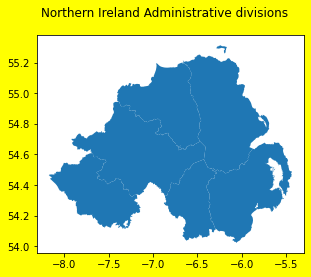

In [23]:
f, ax = plt.subplots(1, edgecolor="blue", facecolor="yellow")
ax = counties_orig.plot(axes=ax)
f.suptitle('Northern Ireland Administrative divisions')
plt.show('CountyName')

<AxesSubplot:>

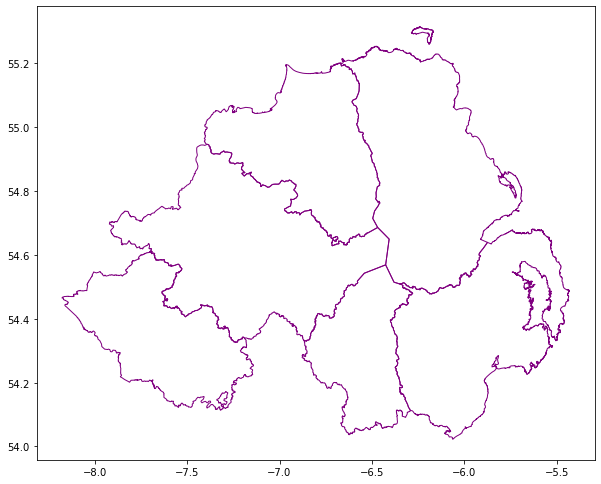

In [24]:
counties_orig.plot(figsize=(10,10), edgecolor="purple", facecolor="None") # plot the counties in the Northern Ireland

<AxesSubplot:>

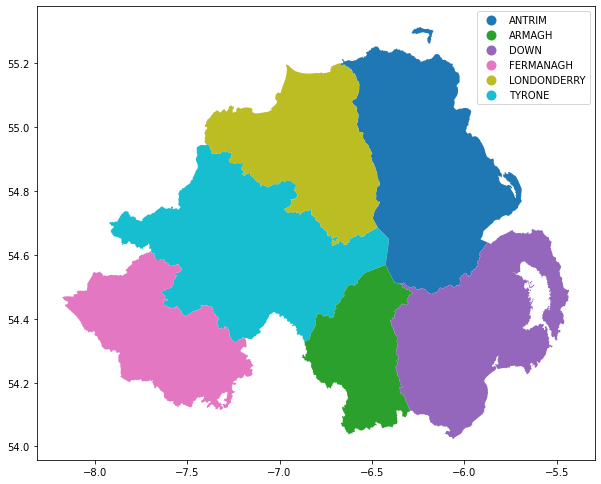

In [25]:
counties_orig.plot('CountyName', legend=True, figsize=(10, 10)) # add symbologies and legend to the counties map

In [26]:
counties_orig.crs # check the coordinate system of the counties shapefile

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
counties = counties_orig.to_crs(epsg=29902) # change the CRS to epsg=29902, to match the radon data coordinates

In [28]:
counties.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

# Note the difference in the X, Y values above.

<AxesSubplot:>

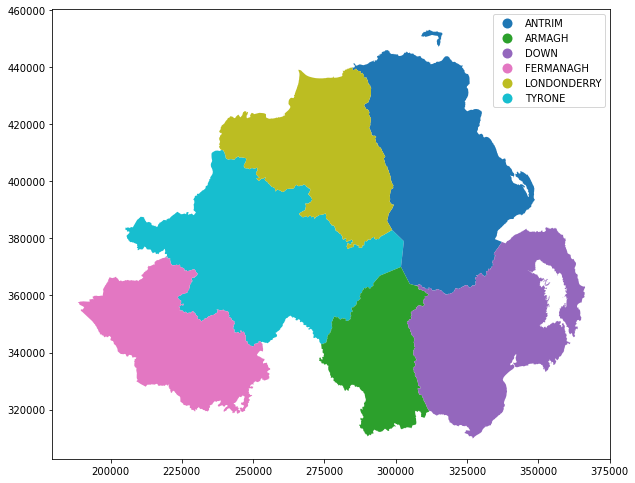

In [29]:
counties.plot('CountyName', legend=True, figsize=(10, 10)) # map again using the new CRS

In [30]:
print(radon.crs == counties.crs) # check if the CRS of the radon and counties data are the same

True


In [31]:
radon_counties = gpd.sjoin(counties, radon, how='inner', lsuffix='left', rsuffix='right')  # join the two datasets into one

In [32]:
radon_counties # display the new dataset, point datasets combining the radon and the county each point is located within

COUNTY_ID CountyName    Area_SqKM  OBJECTID  \
0           6     TYRONE  3265.796622         1   
0           6     TYRONE  3265.796622         1   
0           6     TYRONE  3265.796622         1   
0           6     TYRONE  3265.796622         1   
0           6     TYRONE  3265.796622         1   
..        ...        ...          ...       ...   
5           3       DOWN  2491.238606         6   
5           3       DOWN  2491.238606         6   
5           3       DOWN  2491.238606         6   
5           3       DOWN  2491.238606         6   
5           3       DOWN  2491.238606         6   

                                             geometry  index_right   Tile  \
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11267  H7546   
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11268  H7646   
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11109  H7647   
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11723  H7343   
0   POLYGON ((239669.128 410673.862, 239674.096 41...        11724  H7443   
..                                                ...          ...    ...   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8630  J2662   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8631  J2762   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8612  J0862   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8445  J0863   
5   MULTIPOLYGON (((325844.568 312608.674, 325840....         8444  J0763   

    class       x       y  
0       4  275500  346500  
0       3  276500  346500  
0       2  276500  347500  
0       3  273500  343500  
0       3  274500  343500  
..    ...     ...     ...  
5       1  326500  362500  
5       1  327500  362500  
5       3  308500  362500  
5       1  308500  363500  
5       1  307500  363500  

[13855 rows x 10 columns]

In [33]:
radon_counties.shape # structure of the new dataset; 13855 rows and 10 columns

(13855, 10)

In [34]:
radon_counties.info() #type of data within the new dataset

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 13855 entries, 0 to 5
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   COUNTY_ID    13855 non-null  int64   
 1   CountyName   13855 non-null  object  
 2   Area_SqKM    13855 non-null  float64 
 3   OBJECTID     13855 non-null  int64   
 4   geometry     13855 non-null  geometry
 5   index_right  13855 non-null  int64   
 6   Tile         13855 non-null  object  
 7   class        13855 non-null  int64   
 8   x            13855 non-null  int64   
 9   y            13855 non-null  int64   
dtypes: float64(1), geometry(1), int64(6), object(2)
memory usage: 1.2+ MB


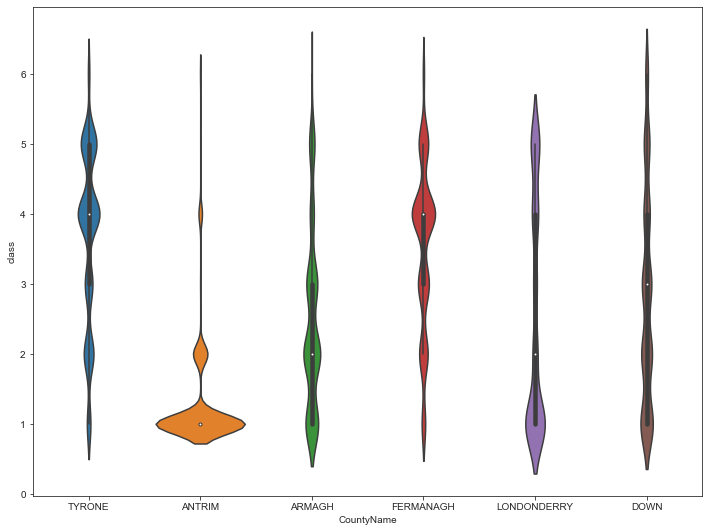

In [35]:
# distribution of various classes within the counties. Every county contian the 6 classess, except County LONDONDERRY
# adopted from: https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# set the size of the graph
fig.set_size_inches(12, 9)
sns.violinplot(x = "CountyName", y = "class", data = radon_counties)
#save the figure as an image
fig.savefig('Radon_classes_Counties.png')

In [36]:
# assign the CRS to the new dataset
radon_counties_gdf = gpd.GeoDataFrame(radon_counties, geometry=gpd.points_from_xy(radon_counties.x, radon_counties.y), crs='+init=epsg:29902')

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [37]:
radon_counties_gdf.crs # check the CRS

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [38]:
radon_counties_gdf.to_file('data_files/radon_counties.shp') # create a new shapefile combining the radon and the counties data

<ipython-input-38-f73753d8efe0>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  radon_counties_gdf.to_file('data_files/radon_counties.shp') # create a new shapefile combining the radon and the counties data


In [39]:
radon_counties = gpd.read_file('data_files/radon_counties.shp') # load the radon_counties shapefile

In [40]:
radon_counties.CountyName.describe() # show a brief description of the new shapefile

count      13855
unique         6
top       TYRONE
freq        3184
Name: CountyName, dtype: object

In [41]:
radon_counties # display the attributes of the new shapefile

COUNTY_ID CountyName    Area_SqKM  OBJECTID  index_righ   Tile  class  \
0              6     TYRONE  3265.796622         1       11267  H7546      4   
1              6     TYRONE  3265.796622         1       11268  H7646      3   
2              6     TYRONE  3265.796622         1       11109  H7647      2   
3              6     TYRONE  3265.796622         1       11723  H7343      3   
4              6     TYRONE  3265.796622         1       11724  H7443      3   
...          ...        ...          ...       ...         ...    ...    ...   
13850          3       DOWN  2491.238606         6        8630  J2662      1   
13851          3       DOWN  2491.238606         6        8631  J2762      1   
13852          3       DOWN  2491.238606         6        8612  J0862      3   
13853          3       DOWN  2491.238606         6        8445  J0863      1   
13854          3       DOWN  2491.238606         6        8444  J0763      1   

            x       y                       geometry  
0      275500  346500  POINT (275500.000 346500.000)  
1      276500  346500  POINT (276500.000 346500.000)  
2      276500  347500  POINT (276500.000 347500.000)  
3      273500  343500  POINT (273500.000 343500.000)  
4      274500  343500  POINT (274500.000 343500.000)  
...       ...     ...                            ...  
13850  326500  362500  POINT (326500.000 362500.000)  
13851  327500  362500  POINT (327500.000 362500.000)  
13852  308500  362500  POINT (308500.000 362500.000)  
13853  308500  363500  POINT (308500.000 363500.000)  
13854  307500  363500  POINT (307500.000 363500.000)  

[13855 rows x 10 columns]

In [42]:
radon_counties.groupby(['class']).count() # display the counts of each class

COUNTY_ID  CountyName  Area_SqKM  OBJECTID  index_righ  Tile     x  \
class                                                                       
1           4699        4699       4699      4699        4699  4699  4699   
2           2431        2431       2431      2431        2431  2431  2431   
3           1721        1721       1721      1721        1721  1721  1721   
4           2734        2734       2734      2734        2734  2734  2734   
5           2002        2002       2002      2002        2002  2002  2002   
6            268         268        268       268         268   268   268   

          y  geometry  
class                  
1      4699      4699  
2      2431      2431  
3      1721      1721  
4      2734      2734  
5      2002      2002  
6       268       268

In [43]:
print(radon_counties.groupby(['CountyName', 'class'])['class'].count()) # summarize the radon distribution in each County

CountyName   class
ANTRIM       1        2448
             2         397
             3           7
             4          96
             5           1
             6          11
ARMAGH       1         327
             2         434
             3         283
             4         103
             5         138
             6           3
DOWN         1         656
             2         568
             3         501
             4         331
             5         300
             6         139
FERMANAGH    1         113
             2         273
             3         349
             4         745
             5         305
             6          39
LONDONDERRY  1         964
             2         241
             3         174
             4         303
             5         422
TYRONE       1         191
             2         518
             3         407
             4        1156
             5         836
             6          76
Name: class, dtype: int64


<AxesSubplot:ylabel='CountyName'>

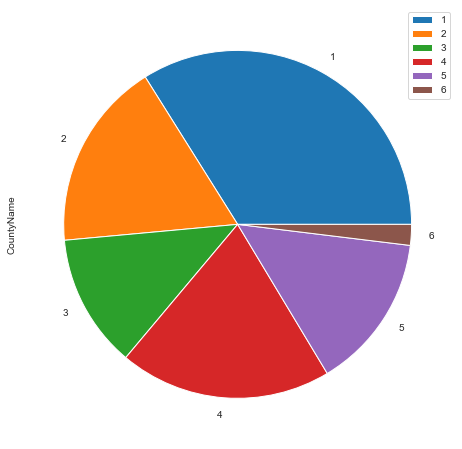

In [44]:
# Pie plot of each class count in the Northern Ireland. Class 1 is the top while class 6 is the lowest
radon_counties.groupby(['class']).count().plot(kind='pie', y='CountyName', figsize=(8, 8))

In [45]:
radon_counties.groupby("CountyName")["class"].mean()  # Average radon class in each county

CountyName
ANTRIM         1.256081
ARMAGH         2.456522
DOWN           2.786774
FERMANAGH      3.533443
LONDONDERRY    2.514259
TYRONE         3.677136
Name: class, dtype: float64

In [46]:
# Average radon class in each county, sorted by the highest. County Tyrone shows the highest radon potential risk, with an average of 3.68
radon_counties.groupby("CountyName").mean().sort_values(by = "class", ascending = False) 

COUNTY_ID    Area_SqKM  OBJECTID    index_righ     class  \
CountyName                                                              
TYRONE             6.0  3265.796622       1.0   7004.829774  3.677136   
FERMANAGH          4.0  1850.832538       4.0  11370.660636  3.533443   
DOWN               3.0  2491.238606       6.0  10890.040481  2.786774   
LONDONDERRY        5.0  2118.316853       5.0   2655.370722  2.514259   
ARMAGH             2.0  1327.228438       3.0  12102.815217  2.456522   
ANTRIM             1.0  3097.847750       2.0   3355.223986  1.256081   

                         x              y  
CountyName                                 
TYRONE       253130.025126  374022.613065  
FERMANAGH    223566.885965  344410.635965  
DOWN         333823.046092  347807.815631  
LONDONDERRY  273890.209125  409728.136882  
ARMAGH       294173.913043  339005.434783  
ANTRIM       316042.567568  405103.378378

Note that County Tyrone is the largest in area, also display the highest average radon potential risk.
Hence, we will focus on this county for a bit of time to understand the radon distribution in this specific county

In [47]:
# subset the data, i.e. create a new dataset representing the radon distribution in the County Tyrone
county_tyrone = radon_counties[radon_counties.CountyName == "TYRONE"]
len(county_tyrone) # returns the number of radon data (data count) in county Tyrone

3184

In [48]:
county_tyrone # display the Tyrone dataset

COUNTY_ID CountyName    Area_SqKM  OBJECTID  index_righ   Tile  class  \
0             6     TYRONE  3265.796622         1       11267  H7546      4   
1             6     TYRONE  3265.796622         1       11268  H7646      3   
2             6     TYRONE  3265.796622         1       11109  H7647      2   
3             6     TYRONE  3265.796622         1       11723  H7343      3   
4             6     TYRONE  3265.796622         1       11724  H7443      3   
...         ...        ...          ...       ...         ...    ...    ...   
3179          6     TYRONE  3265.796622         1        2414  C3910      4   
3180          6     TYRONE  3265.796622         1        2411  C3610      4   
3181          6     TYRONE  3265.796622         1        2412  C3710      4   
3182          6     TYRONE  3265.796622         1        2725  C4307      5   
3183          6     TYRONE  3265.796622         1        2622  C4408      5   

           x       y                       geometry  
0     275500  346500  POINT (275500.000 346500.000)  
1     276500  346500  POINT (276500.000 346500.000)  
2     276500  347500  POINT (276500.000 347500.000)  
3     273500  343500  POINT (273500.000 343500.000)  
4     274500  343500  POINT (274500.000 343500.000)  
...      ...     ...                            ...  
3179  239500  410500  POINT (239500.000 410500.000)  
3180  236500  410500  POINT (236500.000 410500.000)  
3181  237500  410500  POINT (237500.000 410500.000)  
3182  243500  407500  POINT (243500.000 407500.000)  
3183  244500  408500  POINT (244500.000 408500.000)  

[3184 rows x 10 columns]

<AxesSubplot:>

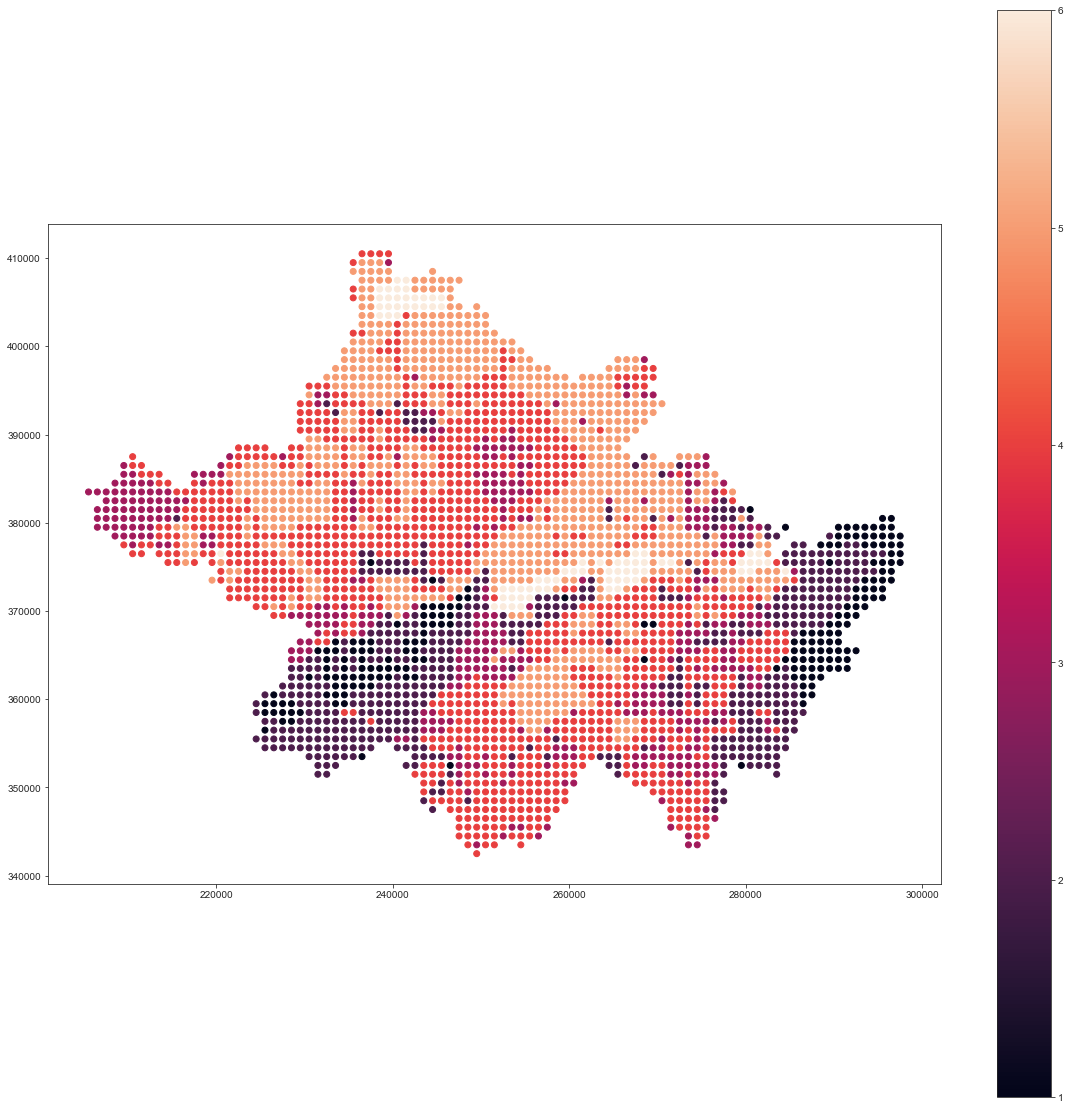

In [49]:
county_tyrone.plot(column='class', cmap=None, legend=True, figsize=(20, 20)) #plot the radon distribution in County Tyrone

In [50]:
county_tyrone.loc[[county_tyrone["class"].idxmax(), county_tyrone["class"].idxmin()]] # show the maximum and minimum class values

COUNTY_ID CountyName    Area_SqKM  OBJECTID  index_righ   Tile  class  \
413          6     TYRONE  3265.796622         1        6873  H8474      6   
81           6     TYRONE  3265.796622         1       10280  H7952      1   

          x       y                       geometry  
413  284500  374500  POINT (284500.000 374500.000)  
81   279500  352500  POINT (279500.000 352500.000)

In [51]:
# calculate the class percentages relative to the total area of the county. Note that County Tyrone area = 3265.796622
tyrone_class_percent = (county_tyrone.groupby(['class'])['class'].count() * 100 / 3265.796622) 
tyrone_class_percent

class
1     5.848496
2    15.861367
3    12.462503
4    35.397183
5    25.598655
6     2.327150
Name: class, dtype: float64

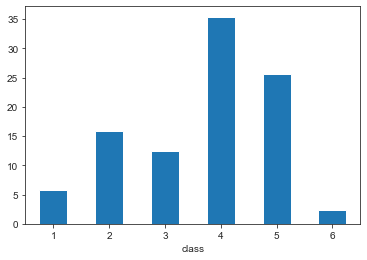

In [52]:
# plot the classes. Note that Class 4 is the highest in the county
ax = tyrone_class_percent.plot.bar(x='lab', y='val', rot=0)

In [53]:
county_tyrone.crs #check CRS

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [54]:
county_tyrone.to_file('data_files/radon_tyrone.shp') # save Tyron data to a new shapefile

Now, we need to anlyse the radon data in relation to the bedrock geology.

In [55]:
# load the bedrock geology layer of Northern Ireland
bedrocks = gpd.read_file('data_files/NIbedrocks.shp')

In [56]:
print(bedrocks.head())

   MSLINK_0        UnitName  Code           area  \
0      3678  ACID VOLCANICS     5  417149.808578   
1      3678  ACID VOLCANICS     5  888522.336647   
2      3659  ACID VOLCANICS     5   55966.145996   
3      3663  ACID VOLCANICS     5   90727.050140   
4      3659  ACID VOLCANICS     5  124752.698090   

                                            geometry  
0  POLYGON ((306027.195 353143.694, 306147.747 35...  
1  POLYGON ((305968.411 353228.661, 306164.238 35...  
2  POLYGON ((313527.461 407868.052, 313589.811 40...  
3  POLYGON ((325888.569 386805.060, 325974.534 38...  
4  POLYGON ((311478.844 406950.057, 311603.542 40...  


C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


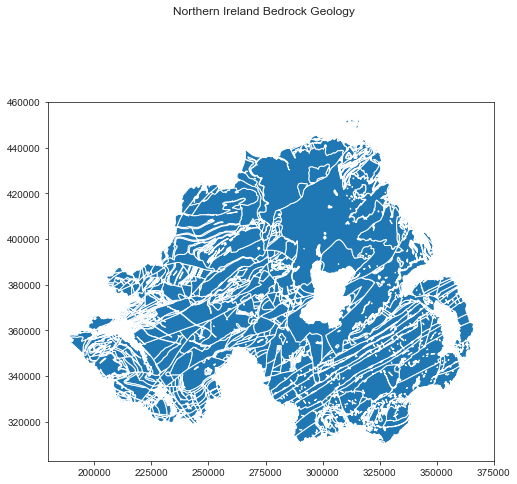

In [58]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = bedrocks.plot(axes=ax)
f.suptitle('Northern Ireland Bedrock Geology')
plt.show('UnitName')

<AxesSubplot:>

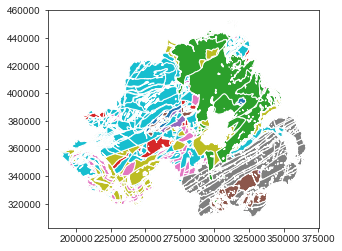

In [57]:
bedrocks.plot('UnitName')

In [59]:
bedrocks

MSLINK_0        UnitName  Code          area  \
0         3678  ACID VOLCANICS     5  4.171498e+05   
1         3678  ACID VOLCANICS     5  8.885223e+05   
2         3659  ACID VOLCANICS     5  5.596615e+04   
3         3663  ACID VOLCANICS     5  9.072705e+04   
4         3659  ACID VOLCANICS     5  1.247527e+05   
...        ...             ...   ...           ...   
2258      3602       SANDSTONE     8  1.299333e+08   
2259      3689       SANDSTONE     8  2.949386e+05   
2260      3581       SANDSTONE     8  3.032128e+05   
2261         0       SANDSTONE     8  1.311301e+01   
2262         0       SANDSTONE     8  2.384296e+01   

                                               geometry  
0     POLYGON ((306027.195 353143.694, 306147.747 35...  
1     POLYGON ((305968.411 353228.661, 306164.238 35...  
2     POLYGON ((313527.461 407868.052, 313589.811 40...  
3     POLYGON ((325888.569 386805.060, 325974.534 38...  
4     POLYGON ((311478.844 406950.057, 311603.542 40...  
...                                                 ...  
2258  POLYGON ((275379.821 345384.076, 275448.622 34...  
2259  POLYGON ((344783.212 372882.594, 344956.610 37...  
2260  POLYGON ((310257.133 438486.495, 310370.824 43...  
2261  POLYGON ((262865.226 428766.507, 262868.173 42...  
2262  POLYGON ((247234.616 421601.542, 247238.460 42...  

[2263 rows x 5 columns]

In [60]:
bedrocks.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [61]:
bedrocks['UnitName'].value_counts() # number of polygons of each bedrock type

LIMESTONE                 492
MUDSTONE                  490
SANDSTONE                 346
BASALT                    343
GRANITE                   184
LITHIC ARENITE            174
PSAMMITE & Semi-Pelite    139
CONGLOMERATE               41
ACID VOLCANICS             24
ANDESITE                   18
GABBRO                     12
Name: UnitName, dtype: int64

In [62]:
bedrocks['UnitName'].value_counts(normalize=True)

LIMESTONE                 0.217411
MUDSTONE                  0.216527
SANDSTONE                 0.152894
BASALT                    0.151569
GRANITE                   0.081308
LITHIC ARENITE            0.076889
PSAMMITE & Semi-Pelite    0.061423
CONGLOMERATE              0.018118
ACID VOLCANICS            0.010605
ANDESITE                  0.007954
GABBRO                    0.005303
Name: UnitName, dtype: float64

In [63]:
bedrocks['UnitName'].describe()

count          2263
unique           11
top       LIMESTONE
freq            492
Name: UnitName, dtype: object

In [65]:
radon_bedrock_counties = gpd.sjoin(bedrocks, radon_counties, how='inner', lsuffix='left', rsuffix='right') 

In [66]:
radon_bedrock_counties

MSLINK_0        UnitName  Code          area  \
1         3678  ACID VOLCANICS     5  8.885223e+05   
1         3678  ACID VOLCANICS     5  8.885223e+05   
3         3663  ACID VOLCANICS     5  9.072705e+04   
4         3659  ACID VOLCANICS     5  1.247527e+05   
9         3659  ACID VOLCANICS     5  9.223958e+05   
...        ...             ...   ...           ...   
2258      3602       SANDSTONE     8  1.299333e+08   
2258      3602       SANDSTONE     8  1.299333e+08   
2258      3602       SANDSTONE     8  1.299333e+08   
2258      3602       SANDSTONE     8  1.299333e+08   
2258      3602       SANDSTONE     8  1.299333e+08   

                                               geometry  index_right  \
1     POLYGON ((305968.411 353228.661, 306164.238 35...        13760   
1     POLYGON ((305968.411 353228.661, 306164.238 35...        13634   
3     POLYGON ((325888.569 386805.060, 325974.534 38...         4223   
4     POLYGON ((311478.844 406950.057, 311603.542 40...         5146   
9     POLYGON ((319385.996 357532.585, 319634.394 35...        13678   
...                                                 ...          ...   
2258  POLYGON ((275379.821 345384.076, 275448.622 34...           84   
2258  POLYGON ((275379.821 345384.076, 275448.622 34...          152   
2258  POLYGON ((275379.821 345384.076, 275448.622 34...          151   
2258  POLYGON ((275379.821 345384.076, 275448.622 34...          154   
2258  POLYGON ((275379.821 345384.076, 275448.622 34...          155   

      COUNTY_ID CountyName    Area_SqKM  OBJECTID  index_righ   Tile  class  \
1             3       DOWN  2491.238606         6       10307  J0652      1   
1             3       DOWN  2491.238606         6       10134  J0653      4   
3             1     ANTRIM  3097.847750         2        5275  J2586      1   
4             1     ANTRIM  3097.847750         2        2897  D1106      1   
9             3       DOWN  2491.238606         6        9453  J1957      1   
...         ...        ...          ...       ...         ...    ...    ...   
2258          6     TYRONE  3265.796622         1       10107  H7953      2   
2258          6     TYRONE  3265.796622         1       10109  H8153      2   
2258          6     TYRONE  3265.796622         1       10108  H8053      2   
2258          6     TYRONE  3265.796622         1        9935  H8054      2   
2258          6     TYRONE  3265.796622         1        9936  H8154      2   

           x       y  
1     306500  352500  
1     306500  353500  
3     325500  386500  
4     311500  406500  
9     319500  357500  
...      ...     ...  
2258  279500  353500  
2258  281500  353500  
2258  280500  353500  
2258  280500  354500  
2258  281500  354500  

[13456 rows x 15 columns]

In [68]:
# subset the data, i.e. create a new dataset representing the radon distribution in the County Tyrone
radon_bedrock_tyrone = radon_bedrock_counties[radon_bedrock_counties.CountyName == "TYRONE"]
len(radon_bedrock_counties) # returns the number of radon data (data count) in county Tyrone

13456

In [69]:
radon_bedrock_tyrone.to_file('data_files/radon_bedrock.shp')

<ipython-input-69-c1216b5834e7>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  radon_bedrock_tyrone.to_file('data_files/radon_bedrock.shp')


In [70]:
radon_bedrock_tyrone.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

<AxesSubplot:>

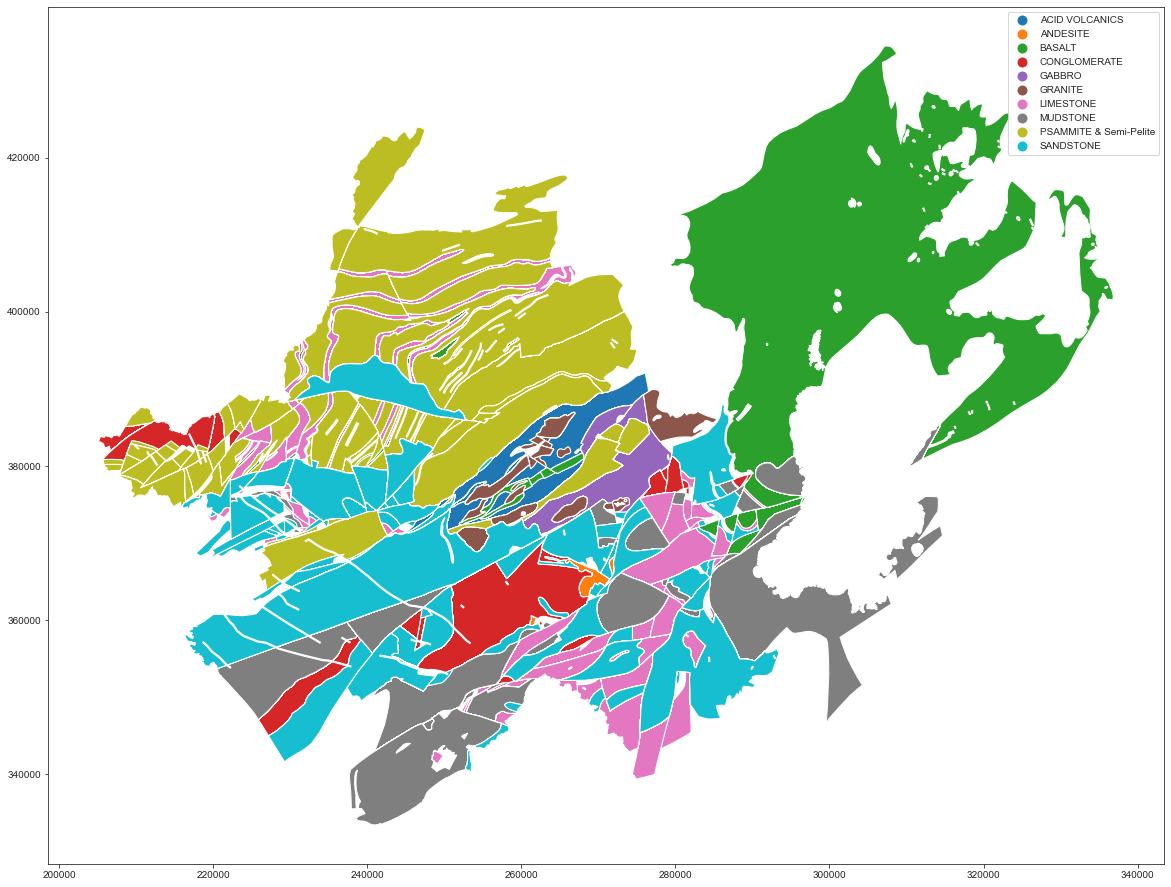

In [73]:
%matplotlib inline

radon_bedrock_tyrone.plot(column='UnitName', cmap=None, legend=True, figsize=(20, 20))

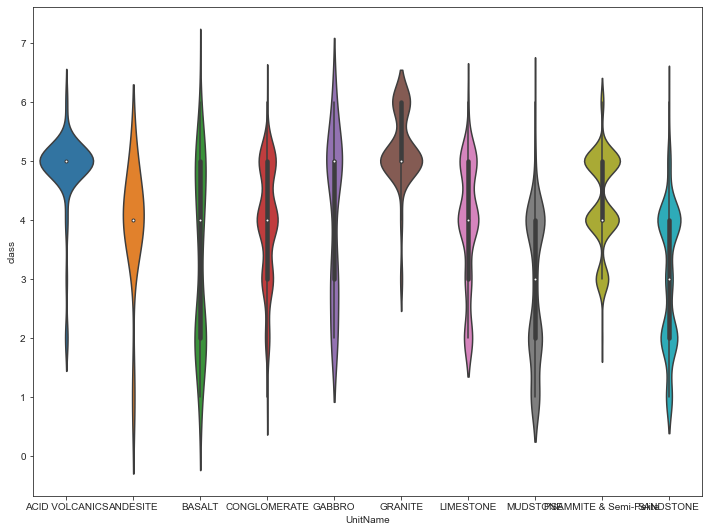

In [74]:
# distribution of various classes within the counties. Every county contian the 6 classess, except County LONDONDERRY
# adopted from: https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# set the size of the graph
fig.set_size_inches(12, 9)
sns.violinplot(x = "UnitName", y = "class", data = radon_bedrock_tyrone)
#save the figure as an image
fig.savefig('radon_bedrock_tyrone.png')